In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [102]:
hp_pieces = []
for year in [2015, 2016, 2017, 2018, 2019]:
    hp_pieces.append(pd.read_csv(f"../output/{year}_hp.csv"))
hp = pd.concat(hp_pieces)

In [103]:
peri = pd.read_csv(f"../output/peri.csv")

In [125]:
hp_peri = pd.merge(hp, peri, on="orbit")

# restrict
hp_peri = hp_peri[hp_peri["n_orbits"] > 9]
hp_peri = hp_peri[hp_peri["score"] > 0.8]

In [126]:
hp_peri["dt"] = pd.to_datetime(hp_peri["t_utc"], format="%Y-%m-%dT%H:%M:%S")

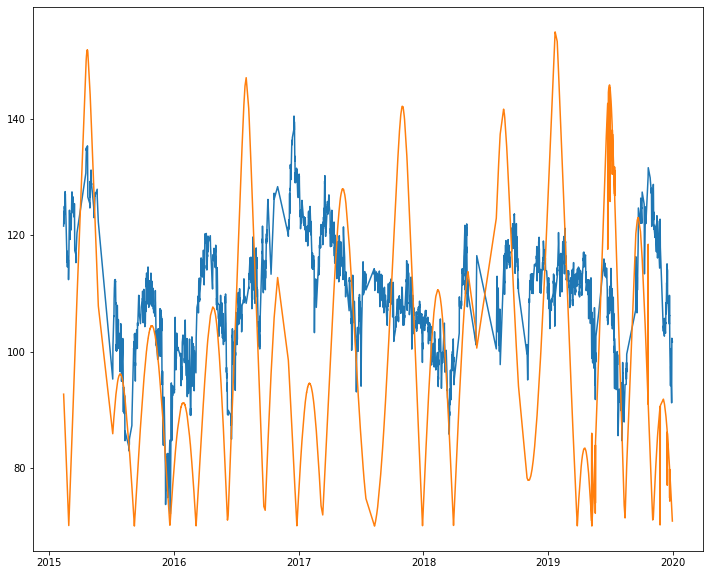

In [141]:
plt.figure(figsize=(12, 10))
plt.plot(hp_peri["dt"], hp_peri["hp_alt"])
plt.plot(hp_peri["dt"], np.abs(90-hp_peri["sza"])+70)
plt.show()

<Figure size 432x288 with 0 Axes>

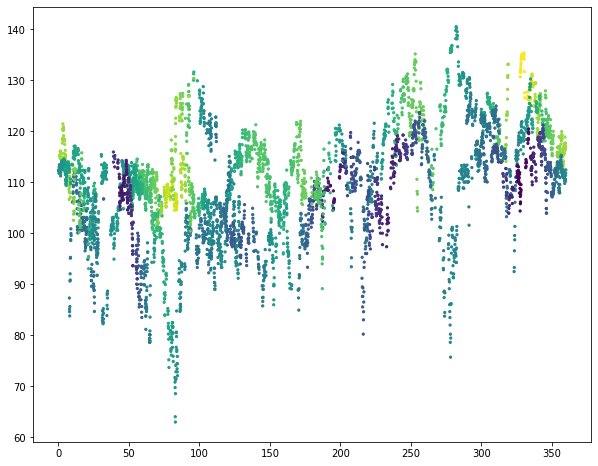

<Figure size 432x288 with 0 Axes>

In [29]:
plt.figure(figsize=(10, 8))
plt.scatter(hp_peri["Ls"], hp_peri["hp_alt"], s=5, c=hp_peri["sza"].apply(lambda x: 180-x))
plt.show()

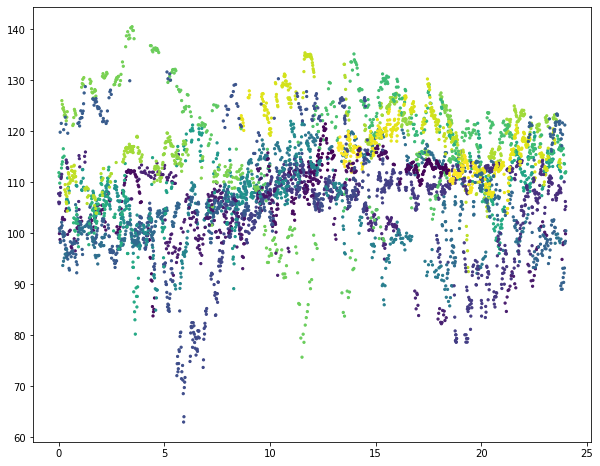

In [43]:
plt.figure(figsize=(10, 8))
plt.scatter(hp_peri["lst"], hp_peri["hp_alt"], s=5, c=hp_peri["Ls"])
plt.show()

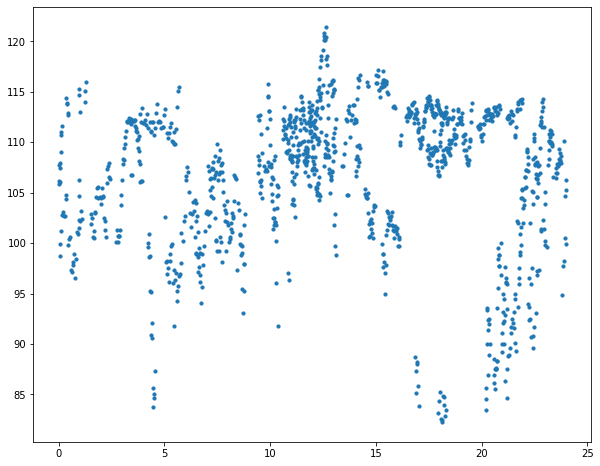

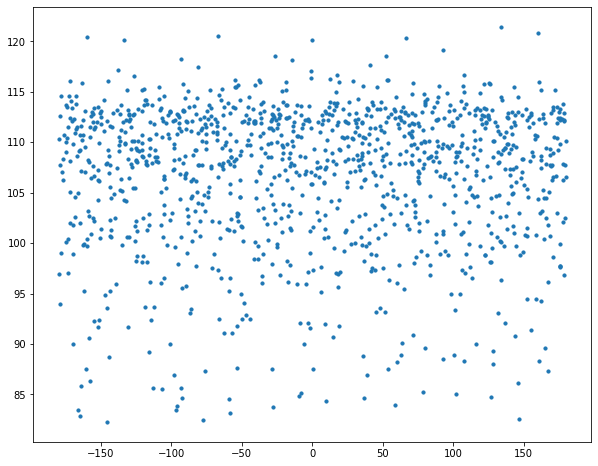

In [54]:
ls_sect_1 = hp_peri[hp_peri["Ls"] < 60]

plt.figure(figsize=(10, 8))
plt.scatter(ls_sect_1["lst"], ls_sect_1["hp_alt"], s=10)
plt.show()

plt.figure(figsize=(10, 8))
plt.scatter(ls_sect_1["long"], ls_sect_1["hp_alt"], s=10)
plt.show()

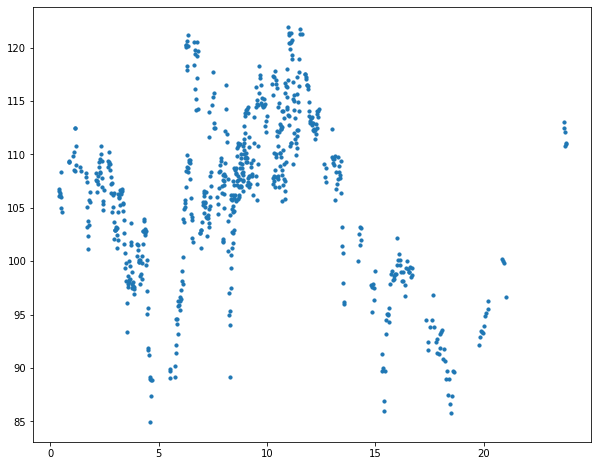

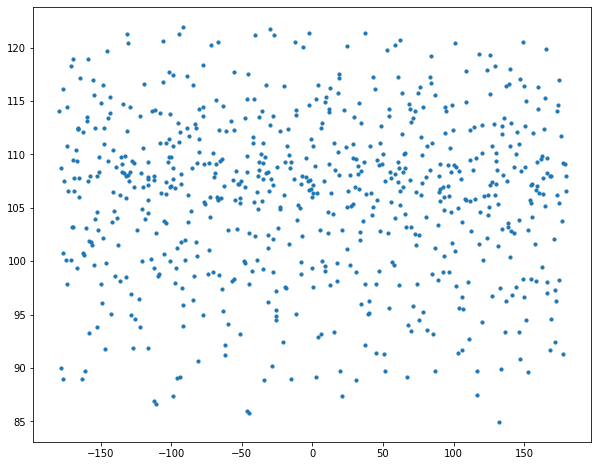

In [56]:
ls_sect_1 = hp_peri[(hp_peri["Ls"] > 140) & (hp_peri["Ls"] < 200)]

plt.figure(figsize=(10, 8))
plt.scatter(ls_sect_1["lst"], ls_sect_1["hp_alt"], s=10)
plt.show()

plt.figure(figsize=(10, 8))
plt.scatter(ls_sect_1["long"], ls_sect_1["hp_alt"], s=10)
plt.show()

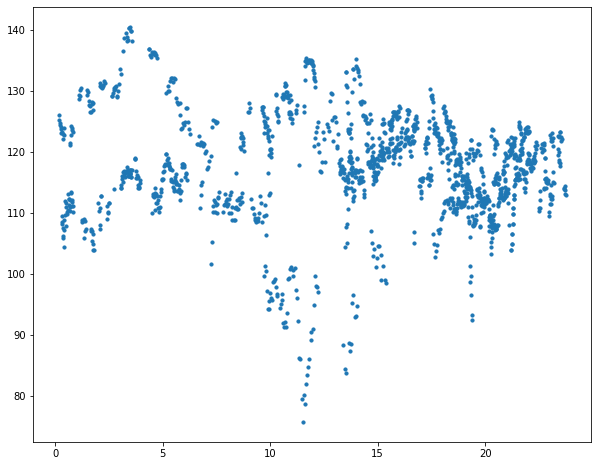

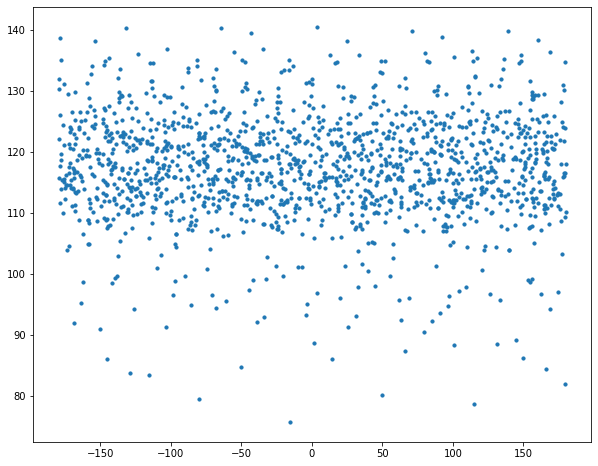

In [57]:
ls_sect_1 = hp_peri[(hp_peri["Ls"] > 250)]

plt.figure(figsize=(10, 8))
plt.scatter(ls_sect_1["lst"], ls_sect_1["hp_alt"], s=10)
plt.show()

plt.figure(figsize=(10, 8))
plt.scatter(ls_sect_1["long"], ls_sect_1["hp_alt"], s=10)
plt.show()

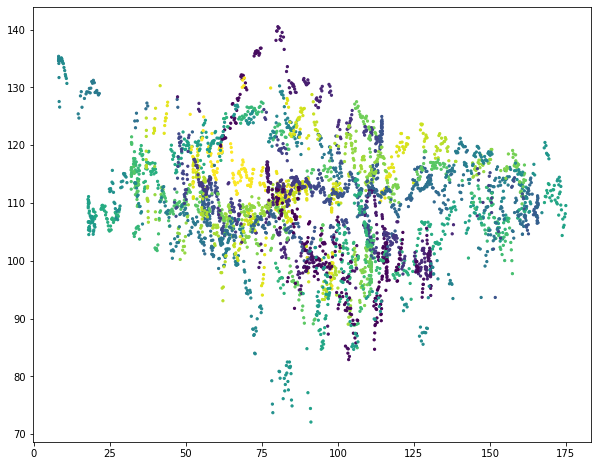

In [130]:
plt.figure(figsize=(10, 8))
plt.scatter(hp_peri["sza"], hp_peri["hp_alt"], s=5, c=hp_peri["lat"])
plt.show()

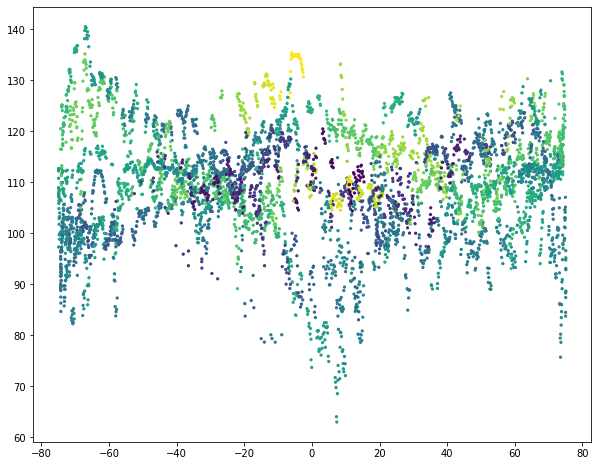

In [49]:
plt.figure(figsize=(10, 8))
plt.scatter(hp_peri["lat"], hp_peri["hp_alt"], s=5, c=hp_peri["sza"].apply(lambda x: 180-x))
plt.show()

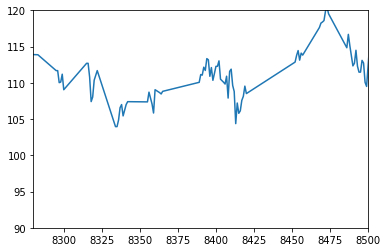

In [53]:
plt.figure()
plt.plot(hp_peri["orbit"], hp_peri["hp_alt"])
plt.xlim(8280, 8500)
plt.ylim(90,120)
plt.show()

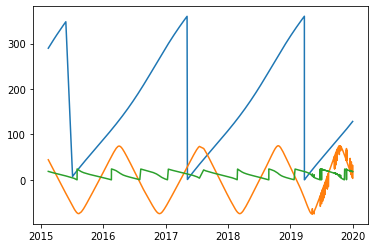

In [60]:
plt.figure()
plt.plot(hp_peri["dt"], hp_peri["Ls"])
plt.plot(hp_peri["dt"], hp_peri["lat"])
plt.plot(hp_peri["dt"], hp_peri["lst"])
plt.show()

In [88]:
tls = hp_peri[(hp_peri["Ls"] > 20) & (hp_peri["Ls"] < 100)]
tls = tls[(tls["lat"] < 0)]

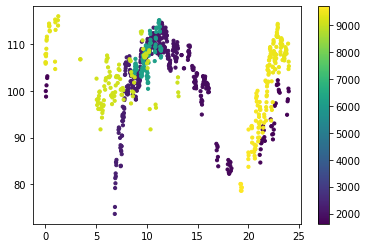

In [89]:
plt.figure()
plt.scatter(tls["lst"], tls["hp_alt"], c=tls["orbit"], s=10)
plt.colorbar()
plt.show()

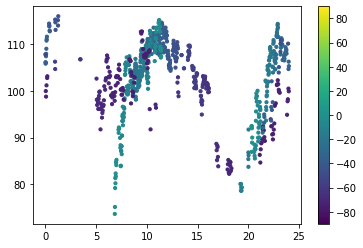

In [81]:
plt.figure()
plt.scatter(tls["lst"], tls["hp_alt"], c=tls["lat"], s=10, vmin=-90, vmax=90)
plt.colorbar()
plt.show()

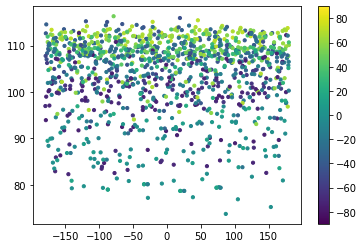

In [69]:
plt.figure()
plt.scatter(tls["long"], tls["hp_alt"], c=tls["lat"], s=10, vmin=-90, vmax=90)
plt.colorbar()
plt.show()